In [1]:
from experiment import Experiment
%matplotlib inline

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
var_dict = dict(
    numerical_vars = ['Number_of_times_pregnant','Plasma_glucose','Diastolic_blood_pressure',
                      'Triceps_skin_fold_thickness','serum_insulin','Body_mass_index',
                      'Diabetes_pedigree_function','Age'],
    class_var = 'class'
)

In [19]:
exp = Experiment('data/pima.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=0.2,
                 cv=5,
                 weight_decay=0.0,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=True,
                 n_bins_range=[3, 5, 10],
                 n_init_bins_list=[5, 10, 15])

In [20]:
exp.data.shape

(768, 9)

In [21]:
list_of_scores = exp.perform_exp()

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


6.684786796569824 training start
>>> Epoch = 1
Loss = 2.2895679473876953
[2, 3, 2, 2, 3, 2, 2, 2] 0.719613670686
>>> Epoch = 2
Loss = 1.8715101480484009
[2, 2, 2, 3, 3, 2, 2, 2] 0.774538383886
>>> Epoch = 3
Loss = 1.742070198059082
[2, 3, 2, 2, 3, 2, 3, 2] 0.78006025248
>>> Epoch = 4
Loss = 1.6632369756698608
[2, 3, 2, 4, 3, 2, 2, 2] 0.776584244133
>>> Epoch = 5
Loss = 1.61606764793396
[2, 3, 2, 2, 3, 2, 3, 2] 0.794009868318
>>> Epoch = 6
Loss = 1.6061581373214722
[2, 3, 2, 6, 3, 2, 3, 2] 0.813395559546
>>> Epoch = 7
Loss = 1.5750019550323486
[2, 2, 2, 2, 3, 2, 2, 2] 0.849167371535
>>> Epoch = 8
Loss = 1.5951573848724365
[2, 2, 2, 2, 3, 2, 2, 3] 0.841324734422
>>> Epoch = 9
Loss = 1.6444801092147827
[2, 2, 2, 2, 3, 2, 2, 2] 0.861085953361
>>> Epoch = 10
Loss = 1.6464626789093018
[2, 2, 2, 3, 3, 2, 2, 2] 0.832048224362
>>> Epoch = 11
Loss = 1.551390290260315
[2, 2, 2, 3, 3, 2, 2, 3] 0.827728469045
>>> Epoch = 12
Loss = 1.5897929668426514
[2, 2, 2, 2, 3, 2, 2, 3] 0.817196100134
>>> Epoch

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


>>> Epoch = 20
Loss = 1.511570692062378
[2, 2, 2, 4, 3, 2, 2, 3] 0.829356902472
>>> Epoch = 21
Loss = 1.5667221546173096
[2, 2, 2, 4, 3, 2, 2, 3] 0.836484803371
>>> Epoch = 22
Loss = 1.441772222518921
[2, 2, 2, 4, 3, 2, 2, 3] 0.834617817459
>>> Epoch = 23
Loss = 1.459252119064331
[2, 2, 2, 4, 3, 2, 3, 3] 0.832731460318
>>> Epoch = 24
Loss = 1.4699416160583496
[2, 2, 2, 3, 3, 2, 2, 3] 0.851188639082
>>> Epoch = 25
Loss = 1.4060146808624268
[2, 2, 2, 3, 3, 2, 2, 3] 0.840497639391
>>> Epoch = 26
Loss = 1.5440196990966797
[2, 2, 2, 3, 3, 2, 2, 3] 0.831431874663
>>> Epoch = 27
Loss = 1.6407146453857422
[2, 2, 2, 4, 3, 2, 2, 3] 0.834953541042
>>> Epoch = 28
Loss = 1.657295823097229
[2, 2, 2, 4, 3, 2, 2, 3] 0.827120469611
>>> Epoch = 29
Loss = 1.4425524473190308
[2, 2, 2, 4, 3, 2, 2, 3] 0.830669959018
>>> Epoch = 30
Loss = 1.596166729927063
[2, 2, 2, 4, 3, 2, 2, 3] 0.839055903841
>>> Epoch = 31
Loss = 1.4335737228393555
[2, 2, 2, 4, 3, 2, 2, 3] 0.836375179594
>>> Epoch = 32
Loss = 1.466823697

>>> Epoch = 22
Loss = 1.9691349267959595
[2, 2, 4, 5, 3, 2, 4, 2] 0.793347130684
>>> Epoch = 23
Loss = 1.9076082706451416
[2, 2, 4, 2, 3, 3, 4, 2] 0.815571700131
>>> Epoch = 24
Loss = 1.9580662250518799
[2, 2, 4, 2, 3, 2, 4, 2] 0.817437235802
>>> Epoch = 25
Loss = 1.8656706809997559
[2, 2, 4, 2, 3, 2, 4, 2] 0.828545520212
>>> Epoch = 26
Loss = 2.0397071838378906
[2, 3, 4, 2, 3, 3, 4, 2] 0.825296320294


/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


>>> Epoch = 27
Loss = 2.0867533683776855
[2, 2, 4, 4, 3, 3, 4, 2] 0.814131261129
>>> Epoch = 28
Loss = 2.1430797576904297
[2, 2, 4, 2, 3, 3, 4, 2] 0.791371168682
>>> Epoch = 29
Loss = 2.008329391479492
[2, 2, 4, 4, 3, 2, 4, 2] 0.803793762324
>>> Epoch = 30
Loss = 2.1045918464660645
[2, 2, 4, 4, 3, 2, 4, 2] 0.803394223252
>>> Epoch = 31
Loss = 1.8934540748596191
[2, 2, 4, 4, 3, 2, 4, 2] 0.797626847199
>>> Epoch = 32
Loss = 1.9175931215286255
[2, 3, 4, 2, 3, 3, 4, 2] 0.826705477116
>>> Epoch = 33
Loss = 2.0524871349334717
[2, 3, 4, 2, 3, 2, 4, 2] 0.828851705753
>>> Epoch = 34
Loss = 1.9865726232528687
[2, 2, 4, 3, 3, 2, 4, 2] 0.832939067917
>>> Epoch = 35
Loss = 1.8528844118118286
[2, 3, 4, 2, 3, 3, 4, 2] 0.82764174306
>>> Epoch = 36
Loss = 2.087394952774048
[2, 2, 4, 3, 3, 2, 4, 2] 0.818941790941
>>> Epoch = 37
Loss = 2.0074379444122314
[2, 2, 4, 2, 3, 3, 4, 2] 0.809941615818
>>> Epoch = 38
Loss = 1.9407298564910889
[2, 2, 4, 3, 3, 2, 4, 2] 0.815564397506
>>> Epoch = 39
Loss = 1.9370865

>>> Epoch = 29
Loss = 2.2375636100769043
[3, 2, 2, 4, 3, 2, 2, 2] 0.73859285583
>>> Epoch = 30
Loss = 2.2785561084747314
[3, 2, 2, 4, 3, 2, 2, 2] 0.741643001663
>>> Epoch = 31
Loss = 2.123873710632324
[3, 2, 2, 4, 3, 2, 2, 2] 0.738099096436
>>> Epoch = 32
Loss = 2.131385087966919
[3, 2, 2, 4, 3, 2, 2, 2] 0.727775492674
>>> Epoch = 33
Loss = 2.244053840637207
[3, 2, 2, 4, 3, 2, 2, 2] 0.730808189071
>>> Epoch = 34
Loss = 2.1224918365478516
[3, 2, 2, 4, 3, 2, 3, 2] 0.705722443085
>>> Epoch = 35
Loss = 2.017369031906128
[3, 2, 2, 4, 3, 2, 2, 2] 0.734077585075
>>> Epoch = 36
Loss = 2.3157012462615967
[3, 2, 2, 4, 3, 2, 2, 2] 0.737534773129
>>> Epoch = 37
Loss = 2.1787633895874023
[3, 2, 2, 4, 3, 2, 2, 2] 0.739076469673
>>> Epoch = 38
Loss = 2.126615285873413
[3, 2, 2, 4, 3, 2, 2, 2] 0.732451547903
>>> Epoch = 39
Loss = 2.159749984741211
[3, 2, 2, 4, 3, 2, 2, 2] 0.735803828008
>>> Epoch = 40
Loss = 2.1279525756835938
[3, 2, 2, 4, 3, 2, 3, 2] 0.696050904892
>>> Epoch = 41
Loss = 2.24956393241

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


>>> Epoch = 76
Loss = 2.1327483654022217
[3, 2, 2, 4, 3, 2, 13, 2] 0.689538294972
>>> Epoch = 77
Loss = 2.1774184703826904
[3, 2, 2, 4, 3, 2, 12, 2] 0.69601226567
>>> Epoch = 78
Loss = 2.243288278579712
[3, 2, 2, 4, 3, 2, 12, 2] 0.699634099255
>>> Epoch = 79
Loss = 2.1367485523223877
[3, 2, 2, 4, 3, 2, 12, 2] 0.707121889512
>>> Epoch = 80
Loss = 2.2008020877838135
[3, 2, 2, 4, 3, 2, 12, 2] 0.704578773768
>>> Epoch = 81
Loss = 2.0896830558776855
[3, 2, 2, 4, 3, 2, 12, 2] 0.700932953432
>>> Epoch = 82
Loss = 2.1919338703155518
[3, 2, 2, 4, 3, 2, 12, 2] 0.698917741112
>>> Epoch = 83
Loss = 1.9588860273361206
[3, 2, 2, 4, 3, 2, 12, 2] 0.69606589071
>>> Epoch = 84
Loss = 2.1570186614990234
[3, 2, 2, 4, 3, 2, 12, 2] 0.691029255543
>>> Epoch = 85
Loss = 2.2164034843444824
[3, 2, 2, 4, 3, 2, 12, 2] 0.690937373415
>>> Epoch = 86
Loss = 2.1662819385528564
[3, 2, 2, 4, 3, 2, 12, 2] 0.69825665542
>>> Epoch = 87
Loss = 2.199021816253662
[3, 2, 2, 4, 3, 2, 12, 2] 0.70433796768
>>> Epoch = 88
Loss = 

In [22]:
result = exp.print_scores(list_of_scores)

In [23]:
result.sort_values(by='kmeans_nmi', ascending=False)

,disc_method,dt_acc_depth=2,dt_acc_depth=3,dt_acc_depth=4,dt_acc_depth=5,dt_acc_depth=6,kmeans_nmi,lr_acc_C=0.1,lr_acc_C=0.3,lr_acc_C=0.5,lr_acc_C=1.0,lr_acc_C=3.0,n_disc_cols,nb_acc,rf_acc_n_est=10,rf_acc_n_est=20,rf_acc_n_est=30,rf_acc_n_est=5
4,ew_3,0.745,0.747,0.749,0.742,0.731,0.127316,0.729,0.728,0.728,0.727,0.723,24,0.716,0.741,0.746,0.744,0.738
5,ef_3,0.762,0.744,0.723,0.721,0.702,0.086221,0.745,0.750,0.748,0.748,0.749,27,0.727,0.693,0.708,0.702,0.684
3,sb_15,0.753,0.744,0.721,0.720,0.720,0.085506,0.747,0.762,0.757,0.754,0.753,30,0.732,0.706,0.711,0.723,0.694
2,sb_10,0.763,0.746,0.743,0.725,0.729,0.071730,0.758,0.759,0.757,0.751,0.749,22,0.737,0.727,0.720,0.723,0.720
6,ew_5,0.730,0.725,0.737,0.742,0.742,0.063161,0.758,0.767,0.768,0.770,0.768,40,0.737,0.740,0.731,0.742,0.727
0,raw,0.737,0.729,0.729,0.749,0.723,0.063144,0.764,0.771,0.771,0.771,0.771,8,0.651,0.745,0.764,0.747,0.710
1,sb_5,0.763,0.767,0.745,0.738,0.737,0.059968,0.749,0.749,0.753,0.753,0.753,19,0.733,0.704,0.701,0.710,0.704
8,ew_10,0.678,0.686,0.708,0.723,0.705,0.012159,0.740,0.753,0.753,0.753,0.757,80,0.747,0.717,0.740,0.742,0.704
9,ef_10,0.741,0.716,0.727,0.719,0.721,0.000747,0.746,0.754,0.757,0.747,0.751,72,0.734,0.733,0.738,0.741,0.725
7,ef_5,0.732,0.728,0.747,0.734,0.732,0.000386,0.758,0.745,0.744,0.740,0.745,44,0.744,0.711,0.741,0.742,0.706


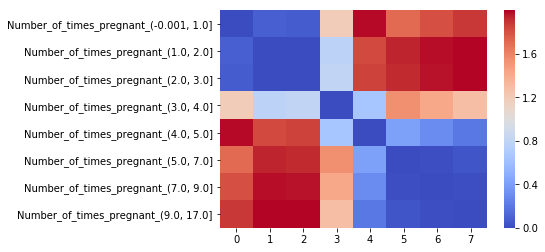

In [24]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Number_of_times_pregnant')

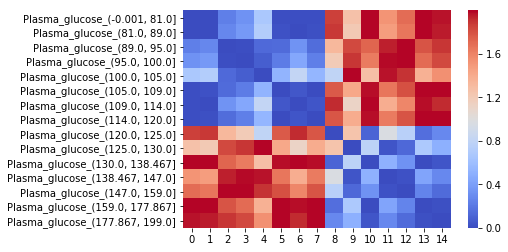

In [25]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Plasma_glucose')

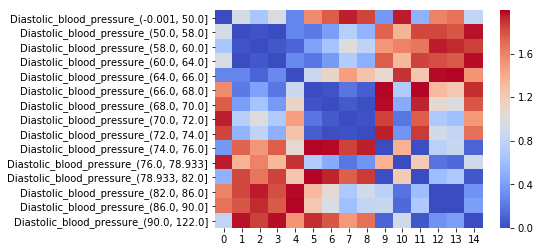

In [26]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Diastolic_blood_pressure')

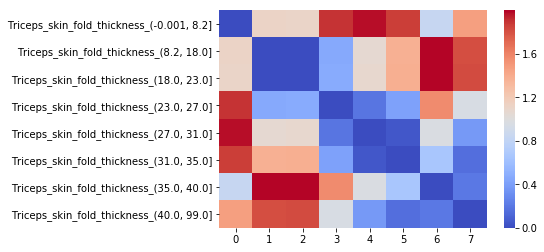

In [27]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Triceps_skin_fold_thickness')

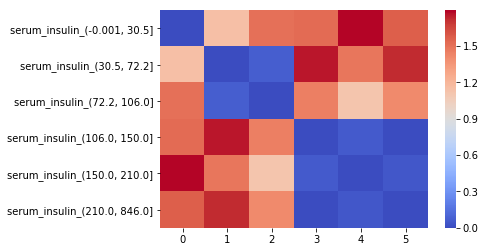

In [28]:
exp.semantic_binning.plot_pairwise_distance_between_bins('serum_insulin')

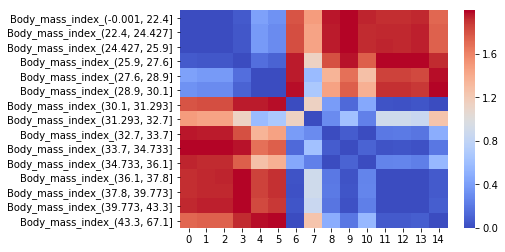

In [29]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Body_mass_index')

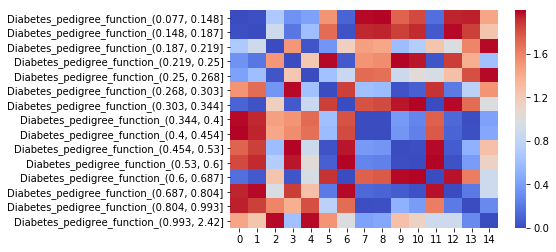

In [30]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Diabetes_pedigree_function')

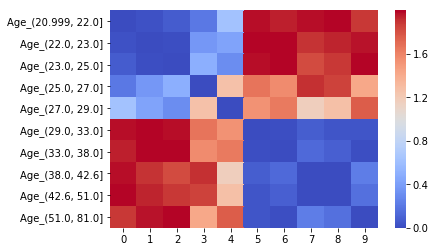

In [31]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Age')

In [32]:
for var, bins in exp.semantic_binning.bins_by_var.items():
    print(var)
    print(bins['bins'])

Number_of_times_pregnant
['(-0.001, 3.0]', '(3.0, 4.0]', '(4.0, 17.0]']
Plasma_glucose
['(-0.001, 120.0]', '(120.0, 199.0]']
Diastolic_blood_pressure
['(-0.001, 74.0]', '(74.0, 122.0]']
Triceps_skin_fold_thickness
['(-0.001, 8.2]', '(8.2, 23.0]', '(23.0, 35.0]', '(35.0, 99.0]']
serum_insulin
['(-0.001, 30.5]', '(30.5, 106.0]', '(106.0, 846.0]']
Body_mass_index
['(-0.001, 30.1]', '(30.1, 67.1]']
Diabetes_pedigree_function
['(0.077, 0.187]', '(0.187, 0.219]', '(0.219, 0.25]', '(0.25, 0.268]', '(0.268, 0.303]', '(0.303, 0.344]', '(0.344, 0.454]', '(0.454, 0.6]', '(0.6, 0.687]', '(0.687, 0.804]', '(0.804, 0.993]', '(0.993, 2.42]']
Age
['(20.999, 29.0]', '(29.0, 81.0]']


In [33]:
from matplotlib import pyplot as plt

def plot_model_comparison_chart(result):
    
    def get_marker_colors(disc_method_list):
        colors = []
        for method in disc_method_list:
            if 'sb' in method:
                colors.append('r')
            if 'ew' in method:
                colors.append('b')
            if 'ef' in method:
                colors.append('g')
        return colors
        
    def get_rel_n_cols(result):
        n_cols = result['n_disc_cols']
        max_n_cols = n_cols.max()
        rel_n_cols = [(x / max_n_cols) for x in n_cols]
        return rel_n_cols
    
    def get_rel_acc(model_name, result):
        if model_name == 'DT':
            acc = result['dt_acc_depth=3']
        if model_name == 'LR':
            acc = result['lr_acc_C=1.0']
        if model_name == 'NB':
            acc = result['nb_acc']
        if model_name == 'RF':
            acc = result['rf_acc_n_est=20']
        if model_name == 'K-means':
            acc = result['kmeans_nmi']
        max_acc = acc.max()
        rel_acc = [(x / max_acc) for x in acc]
        return acc
    
    def make_plot_for_model(model_name, disc_method, rel_acc, rel_n_cols, loc, fig):        
        ax = fig.add_subplot(loc)
        ax.scatter(x=rel_n_cols, y=rel_acc, s=200, c=get_marker_colors(disc_method))
        for i, xy in enumerate(zip(rel_n_cols, rel_acc)):
            ax.annotate(disc_method[i], xy, fontsize=15)
        ax.set_title(model_name, fontsize=25)
        ax.set_xlabel('Relative Number of Columns', fontsize=25)
        if model_name == 'K-means':
            ax.set_ylabel('NMI', fontsize=20)        
        else:
            ax.set_ylabel('Accuracy', fontsize=20)        
        
    result = result.loc[result['disc_method'] != 'raw'].reset_index(drop=True)
    disc_method = result['disc_method']
    rel_n_cols = get_rel_n_cols(result)
    
    fig = plt.figure(figsize=(20,20))
    for model_name, loc in zip(['DT','LR','NB','K-means'], [221,222,223,224]):
        rel_acc = get_rel_acc(model_name, result)
        make_plot_for_model(model_name, disc_method, rel_acc, rel_n_cols, loc, fig)

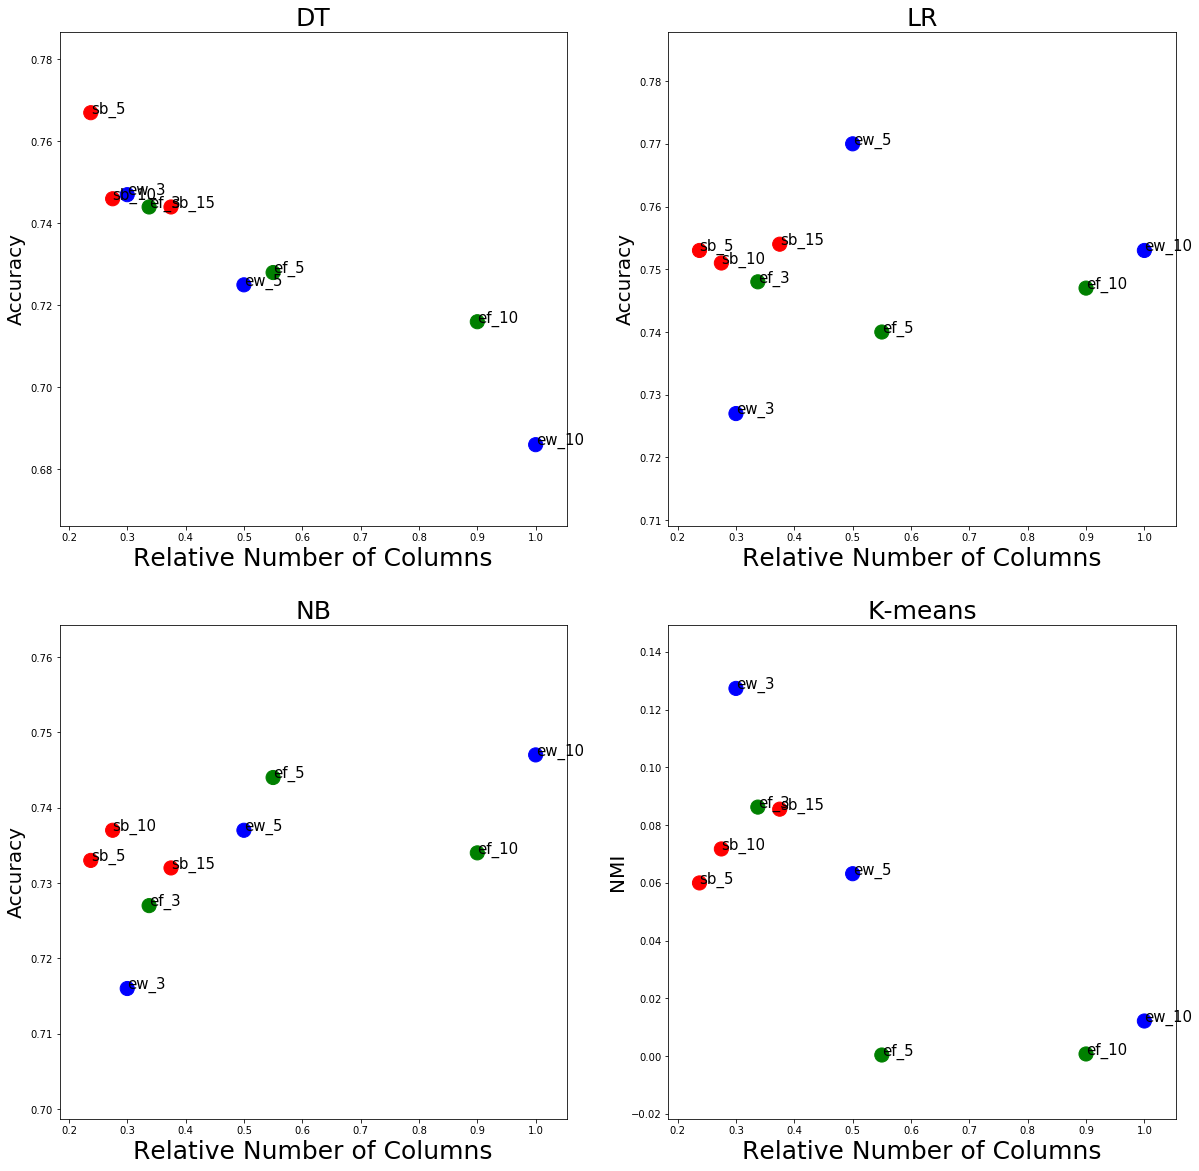

In [34]:
plot_model_comparison_chart(result)